In [1]:
!pip install wget
!pip install jcopdl
! pip install gdown

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=bb564790136f8dca40b431190fef5bc0a3c26bf535dbb0baf45f9e27156414bc
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Created wheel for jcopdl: filename=jcopdl-1.1.9-py2.py3-none-any.whl size=16923 sha256=98814f6623be1f5c6559367d25828f5ead3311e935807cc891219e3604075a7c
  Stored in directory: /root/.cache/pip/wheels/e5/78/9d/931694cba38491e16f1a94719193211fd12a7307570d9bb562
Successfully built jcopdl


In [53]:
import wget
from tqdm import tqdm
import os
import shutil
import zipfile
import gdown
import numpy as np

# Download data
https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset

In [54]:
if os.path.isfile('archive.zip') or os.path.exists('New Masks Dataset/'):
    print("File Sudah ada")
else:
    url = "https://drive.google.com/uc?export=download&id=1xqc_ML2H_6PtrgBS0pxd2pNWbPtjJitX"
    output = "archive.zip"
    gdown.download(url, output, False)
    print("\nDownload Selesai")

File Sudah ada


In [55]:
if os.path.exists('New Masks Dataset/'):
    print("File Sudah di extract")
else:
    with zipfile.ZipFile('archive.zip', mode='r') as zip_file:
        for zf in tqdm(zip_file.infolist(), desc="Extracting"):
            try:
                zip_file.extract(zf)                
            except Exception as e:
                print(e)
    zip_file.close()
    print("Proses extract berhasil")

File Sudah di extract


In [56]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO

### Menghitung banyak data 

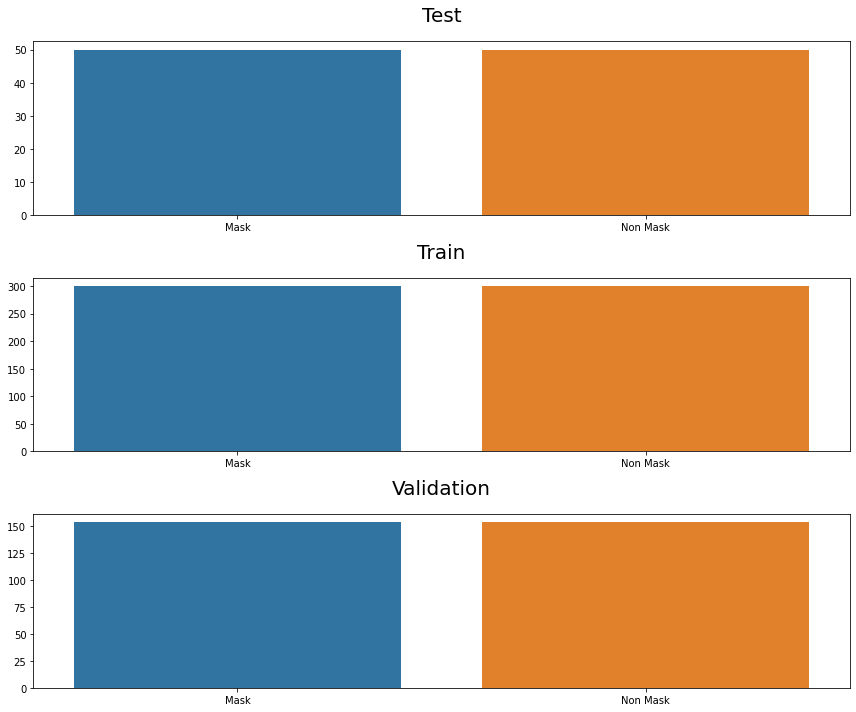

In [57]:
x = ['Test', 'Train', 'Validation']
fig, ax = plt.subplots(3,1, figsize=(12,10))
index=0
for label in x:
    #plt.bar(
    #    ['Mask', 'Non Mask'],
    #    [
    #        len(os.listdir('New Masks Dataset/'+label+'/Mask/')),
    #        len(os.listdir('New Masks Dataset/'+label+'/Non Mask/'))
    #    ]
    #)
    sns.barplot(
        x=['Mask', 'Non Mask'],
        y=[
            len(os.listdir('New Masks Dataset/'+label+'/Mask/')),
            len(os.listdir('New Masks Dataset/'+label+'/Non Mask/'))
        ],
        ax=ax[index]
    )
    ax[index].set_title(label, pad=20, fontsize=20)
    index+=1
    

fig.tight_layout()
fig.show()

### visualize random data

In [58]:
import random 

In [59]:
def show_image(im, title=""):
  plt.figure(figsize=(10,10))
  plt.title(title, size=50)
  plt.imshow(im)
  plt.axis(False)
  plt.show()

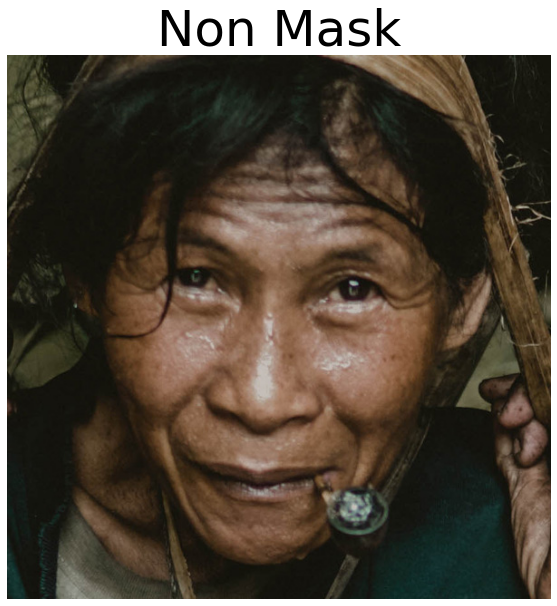

In [60]:
label = ['Mask', 'Non Mask']
idxlabel = random.randint(0, len(label)-1)
target = label[idxlabel]
feature = 'New Masks Dataset/Test/'+target+'/'
idx = random.randint(0, len(os.listdir(feature))-1)
img = Image.open(fp=feature+str(os.listdir(feature)[idx]))
# req = requests.get("https://github.com/googlefonts/roboto/blob/master/src/hinted/Roboto-Regular.ttf?raw=true")

# font = ImageFont.truetype(BytesIO(req.content), 50)
# d = ImageDraw.Draw(img)
# d.text((10,10), str(target), fill=(255,100,0))
# img
title = str(target)
# im = plt.imread(feature+str(os.listdir(feature)[idx]))
show_image(np.array(img), title)

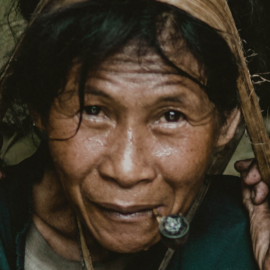

In [62]:
filter_ = transforms.Resize(270)
filter2 = transforms.CenterCrop(256)
#contrast = transforms.ColorJitter(contrast=0.9)
#contrast(img)
#brightness = transforms.ColorJitter(brightness=0.85)
#brightness(img)
#translate = transforms.RandomAffine(0, translate=(0.4, 0.4))
#translate(img)
#hflip = transforms.RandomHorizontalFlip()
filter_(img)

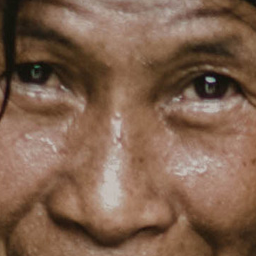

In [63]:
filter2(img)

### Dataset & Dataloader

In [64]:
bs = 50

crop_size = 256

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=crop_size, scale=(0.75,1.0)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(260),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("New Masks Dataset/Train", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

val_set = datasets.ImageFolder("New Masks Dataset/Validation", transform=test_transform)
valloader = DataLoader(val_set, batch_size=bs, shuffle=True)

test_set = datasets.ImageFolder("New Masks Dataset/Test", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs,  shuffle=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [65]:
feature, target = next(iter(trainloader))
feature.shape

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([50, 3, 256, 256])

In [66]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [67]:
from jcopdl.layers import linear_block, conv_block

In [68]:
128*16

2048

In [69]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            conv_block(3, 8),
            conv_block(8, 16),
            conv_block(16, 32),
            conv_block(32, 64),
            conv_block(64, 128),
            conv_block(128, 256),
            nn.Flatten()
        )
        
        self.fc = nn.Sequential(
            linear_block(4096, 1028, dropout=0.25),
            linear_block(1028, 256, dropout=0.25),
            linear_block(256, 64, dropout=0.25),
            linear_block(64, 16, dropout=0.25),
            linear_block(16, 4, dropout=0.25),          
            linear_block(4, 2, activation="lsoftmax")
        )
        
    def forward(self, x):
        return self.fc(self.conv(x))

In [70]:
config = set_config({
    "batch_size":bs,
    "crop_size":crop_size,
    "output_activation": "lsoftmax",
})

In [71]:
model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.003)
callback = Callback(model, config, outdir="model")

In [73]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train:   0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.7293 | Test_cost  = 0.7104 | Train_score = 0.5017 | Test_score = 0.5000 |


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f35a28df320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f35a28df320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.7083 | Test_cost  = 0.6991 | Train_score = 0.5000 | Test_score = 0.5000 |
==> EarlyStop patience =  1 | Best test_score: 0.5000


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.6947 | Test_cost  = 0.6917 | Train_score = 0.5367 | Test_score = 0.5000 |
==> EarlyStop patience =  2 | Best test_score: 0.5000


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.6948 | Test_cost  = 0.6961 | Train_score = 0.5267 | Test_score = 0.5000 |
==> EarlyStop patience =  3 | Best test_score: 0.5000


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.7025 | Test_cost  = 0.6973 | Train_score = 0.4800 | Test_score = 0.5000 |
==> EarlyStop patience =  4 | Best test_score: 0.5000


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.7010 | Test_cost  = 0.6964 | Train_score = 0.5000 | Test_score = 0.5000 |
==> EarlyStop patience =  5 | Best test_score: 0.5000
==> Execute Early Stopping at epoch: 6 | Best test_score: 0.5000
==> Best model is saved at model


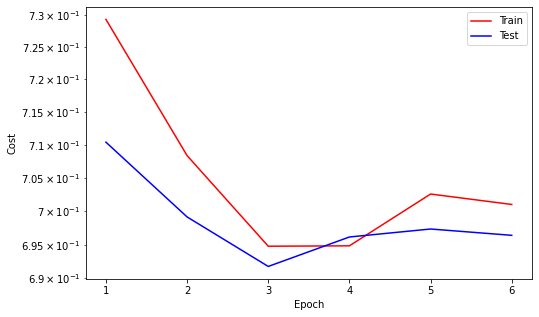

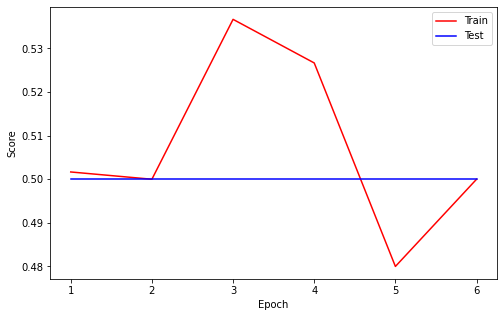

In [74]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

Loss tidak turun